<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 2: Example of a linear classifier based in scalar product

In this notebook, we will use the `Perceptron`, a linear classifier based in the scalar product, to classify the instances in the Iris flower dataset.

Let's import the required classes:

In [1]:
# Import packages
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


We will now create the classifier. In this notebook, we will use the `Perceptron` implementation available in scikit-learn. We will use the default parameters, but it has a long list of them to adjust aspects such as the regularisation, the early stopping or the number of epochs:

```
penalty: {‘l2’,’l1’,’elasticnet’}, default=None
The penalty (aka regularization term) to be used.

alpha: float, default=0.0001
Constant that multiplies the regularization term if regularization is used.

l1_ratio: float, default=0.15
The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty='elasticnet'.

New in version 0.24.

...

max_iter: int, default=1000
The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.

New in version 0.19.

...

early_stopping: bool, default=False
Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

New in version 0.20.

validation_fraction: float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

New in version 0.20.

n_iter_no_change: int, default=5
Number of iterations with no improvement to wait before early stopping.

New in version 0.20.

class_weight: dict, {class_label: weight} or “balanced”, default=None
Preset for the class_weight fit parameter.

Weights associated with classes. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

...
```

In [5]:
# Init the Classifier
model = Perceptron(random_state=4)

We can now train the model:

In [6]:
# Train the model 
model.fit(xtrain, ytrain)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,4


And once trained, predict the labels for the test set:

In [7]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(110.44999999999997, 0.5, 'Predicted')

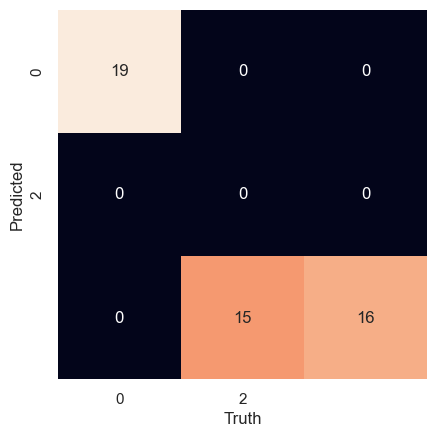

In [8]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In this case, the results are pretty bad. What could that be? If we follow theory, this example should yield exactly the same as the example with the distance-based linear classifier, so why isn't it?

It turns out that neural networks (and the `Perceptron` as its simplest form) are greatly dependent upon their initialisation.

Try to run this loop with different `random_seed` values and pay attention to the outputs.

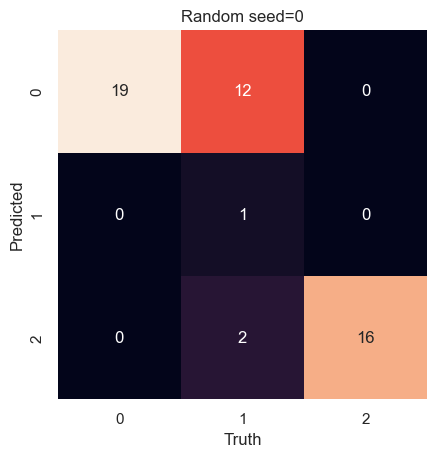

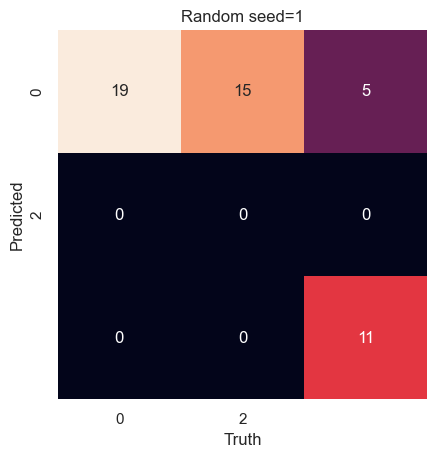

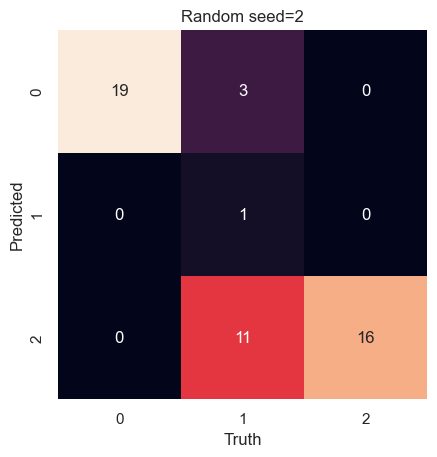

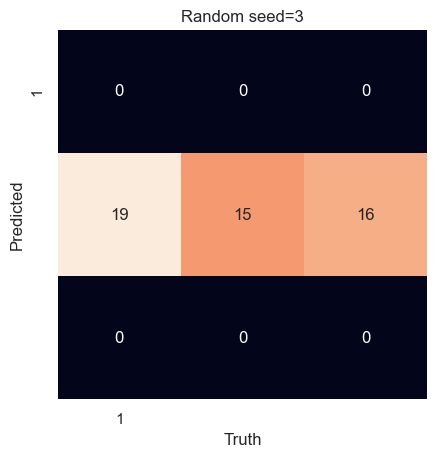

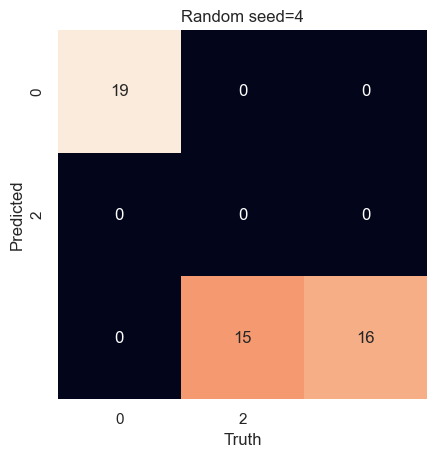

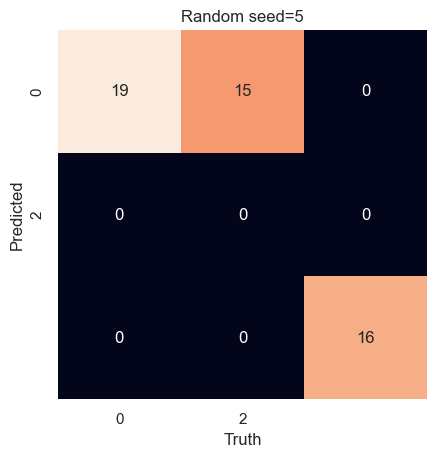

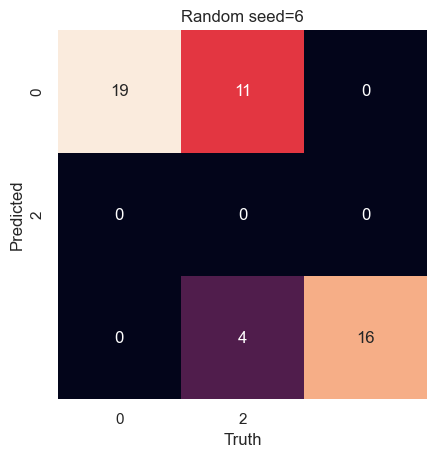

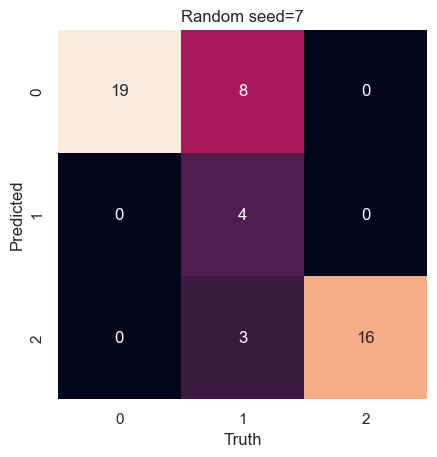

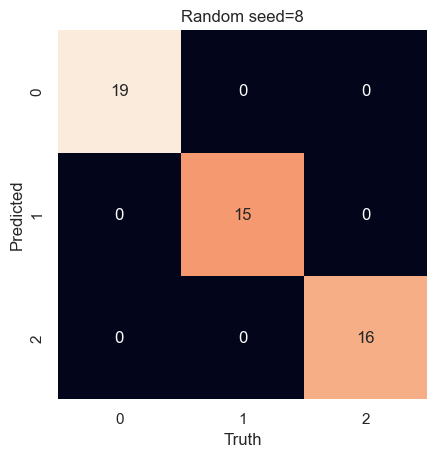

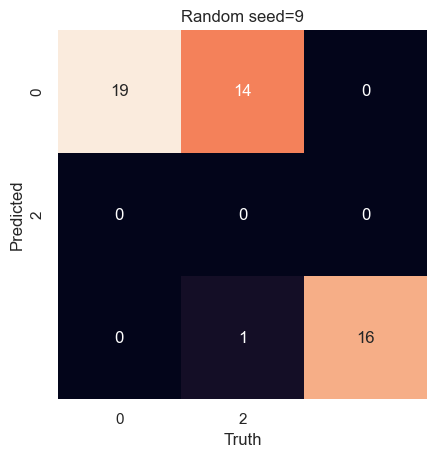

In [9]:
for i in range(0, 10):
    # Init the Classifier
    model = Perceptron(random_state=i)
    # Train the model 
    model.fit(xtrain, ytrain)
    # Predict Output 
    preds = model.predict(xtest)
    # Plot Confusion Matrix
    mat = confusion_matrix(preds, ytest)
    names = np.unique(preds)
    plt.subplots(1)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    plt.title(f'Random seed={i}')

Look at the high variance. For example, by just changing the seed to 8, we were able to get a model that correctly classifies all the samples.

If you feel interested by this topic, please have a read of "[Underspecification Presents Challenges for Credibility in Modern Machine Learning](https://arxiv.org/pdf/2011.03395.pdf)".

We can also compute the most common classification metrics with the help of sklearn.metrics.classification_report. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the documentation.

But first, let's retrain the `Perceptron` with `random_state=8`:

In [10]:
# Init the Classifier
model = Perceptron(random_state=8)
# Train the model 
model.fit(xtrain, ytrain)
# Predict Output 
preds = model.predict(xtest)

In [11]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(0.99, 5.390000000000004, -0.01, 7.89)

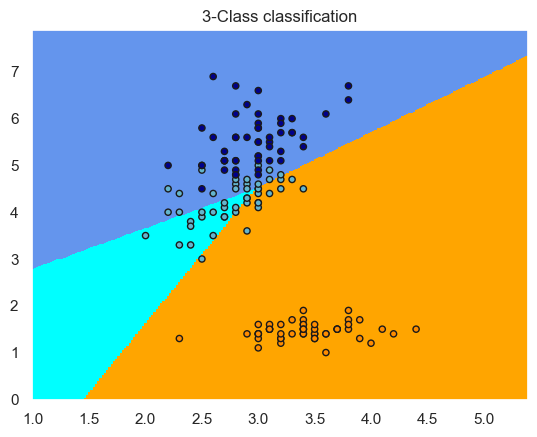

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, 1:3]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, 1:3], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')